### MODEL TRAINING - DECISION TREE

In [2]:
path=r'C:\Users\abcha\anaconda_projects\ADTA_5340\Project_Metro-PT3\Final\EDA_FILE.csv'

In [3]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Import data
clean_df = pd.read_csv(path)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129954 entries, 0 to 129953
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TP2              129954 non-null  float64
 1   TP3              129954 non-null  float64
 2   H1               129954 non-null  float64
 3   DV_pressure      129954 non-null  float64
 4   Reservoirs       129954 non-null  float64
 5   Oil_temperature  129954 non-null  float64
 6   Motor_current    129954 non-null  float64
 7   COMP             129954 non-null  float64
 8   DV_eletric       129954 non-null  float64
 9   Towers           129954 non-null  float64
 10  MPG              129954 non-null  float64
 11  LPS              129954 non-null  float64
 12  Pressure_switch  129954 non-null  float64
 13  Oil_level        129954 non-null  float64
 14  Caudal_impulses  129954 non-null  float64
 15  failure_label    129954 non-null  int64  
dtypes: float64(15), int64(1)
memory usage:

In [5]:
# y = output features
y = clean_df['failure_label']

# X = input features
X = clean_df.drop(['failure_label'], axis=1)

In [6]:
# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (90967, 15) (90967,)
Test set shape: (38987, 15) (38987,)


In [7]:
# Train model with Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
#predictions based on test data
dt_preds = dt_model.predict(X_test)

---- Decision Tree ----
Accuracy: 0.9965373073075641
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30026
           1       0.99      0.99      0.99      8961

    accuracy                           1.00     38987
   macro avg       1.00      0.99      1.00     38987
weighted avg       1.00      1.00      1.00     38987



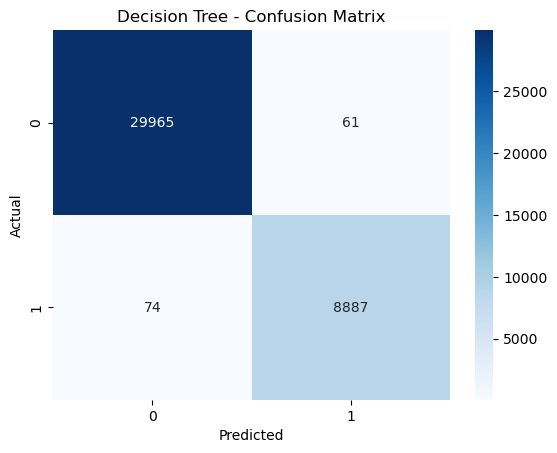

In [9]:
# Evaluate models and check model accuracy
def evaluate_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Model evaluation
evaluate_model("Decision Tree", y_test, dt_preds)